# Tas notebook
### one variable + one realization: Import/open/subset/visualize

### Next challenge: join netcdfs with xarray, average values across xarray obj
https://docs.xarray.dev/en/stable/user-guide/combining.html

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import cartopy
import cartopy.crs
import cartopy.feature as cfeature
import seaborn  

In [5]:
import xarray as xr
import regionmask
import os
#this variable is only checked 
#at first import of GeoPandas.
#toggles on PYGEOS
#os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [6]:
import earthpy 
import netCDF4 as nc
import cftime
#assists gpd with shp opening
import fiona #help(fiona.open)
import rasterio
import odc.geo.xr

In [7]:
import rioxarray

In [8]:
#retrieving directory
os.getcwd()
#'/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal'

'/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal'

In [9]:
#os.chdir("/Users/jenniferbadger/Documents/GitHub/CMIP6-SoCal")

In [10]:
#creating path to CESM2 historical tas r4
path_tas_hist_r4 = "/Users/jenniferbadger/Dropbox/Climatology/Data_new/temp_hist/tas_Amon_CESM2_historical_r4i1p1f1_gn_185001-201412.nc"

In [11]:
#opening netcdf
tas_hist_r4 = nc.Dataset(path_tas_hist_r4)

In [12]:
#retrieves metadata

#variable_id: tas
#frequency: mon
#experiment_id: historical
#nominal_resolution: 100 km = approx. hortizonal res
#realization_index: 4
#parent_time_units: days since 0001-01-01 00:00:00
print (tas_hist_r4)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    case_id: 18
    cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact: cesm_cmip6@ucar.edu
    creation_date: 2019-01-18T18:44:34Z
    data_specs_version: 01.00.29
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    grid: native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label: gn
    initialization_index: 1
    institution: National Center for Atmospheric Research, Climate and Global Dynamics Laboratory, 1850 Table Mesa Drive, Boulder, CO 80305, USA
    institution_id: NCAR
    license: CMIP6 model data produced by <The National Center for Atmospheric Research> is licensed under a Creative Commons Attribution-[]ShareAlike 4.0 International License (https://creativecommons.org/licenses/). Consult https://p

In [13]:
#issues a warning but not an error
#array seems to work
tas_hist_r4 = xr.open_dataset(path_tas_hist_r4, decode_times= True, use_cftime= True, decode_coords="all")

/Users/jenniferbadger/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/var/folders/19/knjb5nd52n90p_gwnf3k939c0000gn/T/ipykernel_3724/1117529888.py:3: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacella']
  tas_hist_r4 = xr.open_dataset(path_tas_hist_r4, decode_times= True, use_cftime= True, decode_coords="all")


In [14]:
#more condensed metadata
print(tas_hist_r4)

#The specification seconds since 1992-10-8 15:15:42.5 -6:00 
#indicates seconds since October 8th, 1992 at 3 hours, 15 minutes and 42.5 seconds 
#in the afternoon in the time zone which is six hours to the west of 
#Coordinated Universal Time (i.e. Mountain Daylight Time). 
#The time zone specification can also be written without a colon 
#using one or two digits (indicating hours) 
#or three or four digits (indicating hours and minutes).

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                18
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-18T18:44:34Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  182500.0
    branch_time_in_child:   674885.0
    

In [15]:
#tas specific metada
#units:K
print(tas_hist_r4['tas'])

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)>
[109486080 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas


In [16]:
#metadata again here under attributes
tas_hist_r4

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                18
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.004
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-18T18:44:34Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  182500.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [17]:
#shows time interval
tas_hist_r4.time.values

#see 4.4 time coordinate 
#for climate & forcasting conventions
#https://cfconventions.org/Data/cf-conventions/cf-conventions-1.10/cf-conventions.html

array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [18]:
#-90 to 90 as expected
tas_hist_r4.lat_bnds.values

array([[-90.       , -89.52879  ],
       [-89.52879  , -88.58639  ],
       [-88.58639  , -87.64398  ],
       [-87.64398  , -86.70157  ],
       [-86.70157  , -85.75916  ],
       [-85.75916  , -84.81676  ],
       [-84.81676  , -83.874344 ],
       [-83.874344 , -82.93194  ],
       [-82.93194  , -81.98953  ],
       [-81.98953  , -81.04712  ],
       [-81.04712  , -80.10471  ],
       [-80.10471  , -79.1623   ],
       [-79.1623   , -78.219894 ],
       [-78.219894 , -77.27749  ],
       [-77.27749  , -76.335075 ],
       [-76.335075 , -75.39267  ],
       [-75.39267  , -74.450264 ],
       [-74.450264 , -73.50785  ],
       [-73.50785  , -72.565445 ],
       [-72.565445 , -71.62304  ],
       [-71.62304  , -70.680626 ],
       [-70.680626 , -69.73822  ],
       [-69.73822  , -68.795815 ],
       [-68.795815 , -67.8534   ],
       [-67.8534   , -66.910995 ],
       [-66.910995 , -65.96859  ],
       [-65.96859  , -65.02618  ],
       [-65.02618  , -64.08377  ],
       [-64.08377  ,

In [19]:
#approx 0-360 as expected
tas_hist_r4.lon_bnds.values

array([[ -0.625,   0.625],
       [  0.625,   1.875],
       [  1.875,   3.125],
       [  3.125,   4.375],
       [  4.375,   5.625],
       [  5.625,   6.875],
       [  6.875,   8.125],
       [  8.125,   9.375],
       [  9.375,  10.625],
       [ 10.625,  11.875],
       [ 11.875,  13.125],
       [ 13.125,  14.375],
       [ 14.375,  15.625],
       [ 15.625,  16.875],
       [ 16.875,  18.125],
       [ 18.125,  19.375],
       [ 19.375,  20.625],
       [ 20.625,  21.875],
       [ 21.875,  23.125],
       [ 23.125,  24.375],
       [ 24.375,  25.625],
       [ 25.625,  26.875],
       [ 26.875,  28.125],
       [ 28.125,  29.375],
       [ 29.375,  30.625],
       [ 30.625,  31.875],
       [ 31.875,  33.125],
       [ 33.125,  34.375],
       [ 34.375,  35.625],
       [ 35.625,  36.875],
       [ 36.875,  38.125],
       [ 38.125,  39.375],
       [ 39.375,  40.625],
       [ 40.625,  41.875],
       [ 41.875,  43.125],
       [ 43.125,  44.375],
       [ 44.375,  45.625],
 

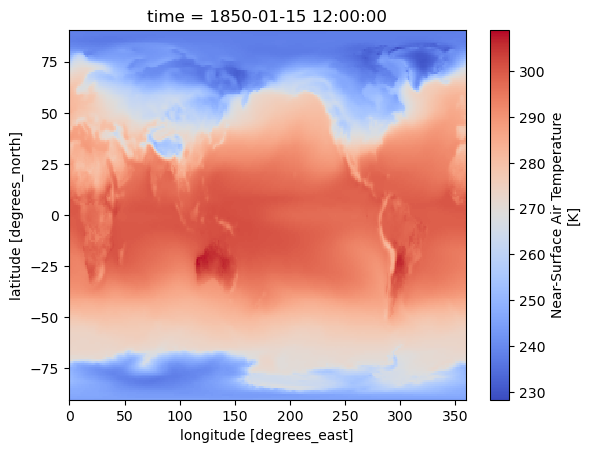

In [20]:
#For xarray datasets, .sel returns a new dataset 
#using a dimension shared by all of the datasets
#in the array, eg (time= specific entry I want to visualize)

#cftime decodes time units + variable values 
#in a netcdf conforming to Climate and Forecasting (CF) netCDF conventions
#https://unidata.github.io/cftime/api.html

#.plot uses matplotlib to visualize the dataset

#cftime.datetime(int year, int month, int day, int hour=0, 
#int minute=0, int second=0, int microsecond=0, 
#int dayofwk=-1, int dayofyr=-1)

#1850 = yr, #1 = Jan, 15=15th, 12,0,0,0= hour/min/sec/microsec
#2= integer day of week- Jan 15th, 1850= Tuesday
#15= integer day of year
tas_global_Jan1850 = tas_hist_r4['tas'].sel(time=cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, 2, 15)).plot(cmap = 'coolwarm')

tas_global_Jan1850

#w/o #int dayofwk=-1, int dayofyr=-1
#yeilds same result

#could make extent with Google Earth Pro
#and use to subset

In [21]:
lat = tas_hist_r4.variables['lat'][:]
lon = tas_hist_r4.variables['lon'][:]

In [22]:
#So Cal counties shp
#from County of LA Enterprise GIS
#https://egis-lacounty.hub.arcgis.com/datasets/lacounty::county-boundaries/explore?location=33.969439%2C-118.754050%2C6.00
#for AOI construction

cali_county_shp = ("/Users/jenniferbadger/Dropbox/Climatology/Data_new/County_Boundaries.zip")

In [23]:
county_gdf = gpd.read_file(cali_county_shp)
county_gdf

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
0,14,Other County,KERN COUNTY,2.254539e+11,2.297113e+06,"MULTIPOLYGON (((-13094857.732 4271549.305, -13..."
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-13126431.355 4021698.860, -13126430..."
2,16,Other County,RIVERSIDE COUNTY,8.300114e+10,1.312613e+06,"POLYGON ((-12942717.828 3952272.640, -12942869..."
3,17,Other County,SAN BERNARDINO COUNTY,2.739830e+11,2.335592e+06,"POLYGON ((-12941319.720 4033413.843, -12941393..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-12942717.828 3952272.640, -12..."
5,19,Other County,SAN LUIS OBISPO COUNTY,8.826784e+10,2.013038e+06,"POLYGON ((-13299646.133 4150459.185, -13300190..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-13299646.133 4150459.185, -13..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-13233732.749 4135263.477, -13..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-13106614.892 4139887.600, -13..."
9,23,LA County,LOS ANGELES COUNTY,2.083714e+09,4.055774e+05,"MULTIPOLYGON (((-13203038.399 3959049.207, -13..."


In [24]:
county_gdf.columns 

Index(['OBJECTID', 'TYPE', 'NAME', 'ShapeSTAre', 'ShapeSTLen', 'geometry'], dtype='object')

In [25]:
#creating a list of Bight Counties
#this didn't work with isin
#bight_counties = ["SANTA BARBARA COUNTY", "VENTURA COUNTY", 
#"LOS ANGELES COUNTY", "ORANGE COUNTY", "SAN DIEGO COUNTY"]

In [26]:
#creating shp subset for AOI
bight_counties_aoi=county_gdf[county_gdf['NAME'].isin(["SANTA BARBARA COUNTY", "VENTURA COUNTY", "LOS ANGELES COUNTY", "ORANGE COUNTY", "SAN DIEGO COUNTY"])]

bight_counties_aoi

,OBJECTID,TYPE,NAME,ShapeSTAre,ShapeSTLen,geometry
1,15,Other County,ORANGE COUNTY,2.210048e+10,7.010162e+05,"POLYGON ((-13126431.355 4021698.860, -13126430..."
4,18,Other County,SAN DIEGO COUNTY,1.057717e+11,1.933786e+06,"MULTIPOLYGON (((-12942717.828 3952272.640, -12..."
6,20,Other County,SANTA BARBARA COUNTY,7.665691e+10,2.246257e+06,"MULTIPOLYGON (((-13299646.133 4150459.185, -13..."
7,21,Other County,VENTURA COUNTY,5.177124e+10,1.229728e+06,"MULTIPOLYGON (((-13233732.749 4135263.477, -13..."
8,22,LA County,LOS ANGELES COUNTY,1.102047e+11,2.284699e+06,"MULTIPOLYGON (((-13106614.892 4139887.600, -13..."
9,23,LA County,LOS ANGELES COUNTY,2.083714e+09,4.055774e+05,"MULTIPOLYGON (((-13203038.399 3959049.207, -13..."
10,24,LA County,LOS ANGELES COUNTY,1.573226e+09,3.575864e+05,"MULTIPOLYGON (((-13201512.023 3899597.281, -13..."


In [27]:
bight_counties_aoi.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
#projecting shp to CA State Plane Zone 6
bight_counties_aoi = bight_counties_aoi.to_crs('EPSG:26946')

In [29]:
#chcking crs
bight_counties_aoi.crs

<Derived Projected CRS: EPSG:26946>
Name: NAD83 / California zone 6
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot: >

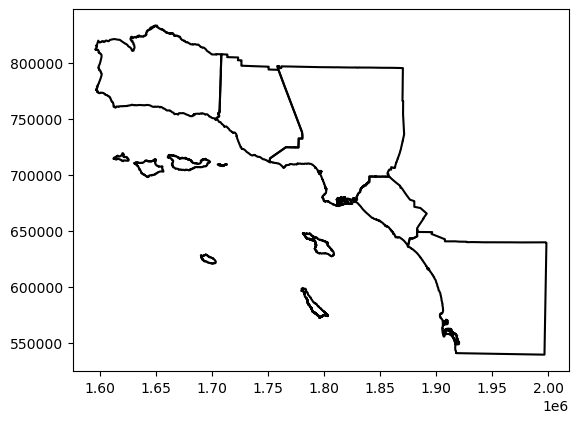

In [30]:
bight_counties_aoi.boundary.plot(color='k')

In [31]:
bight_counties_aoi.iloc[0]

OBJECTID                                                     15
TYPE                                               Other County
NAME                                              ORANGE COUNTY
ShapeSTAre                                   22100480210.613281
ShapeSTLen                                        701016.219095
geometry      POLYGON ((1845928.1172258179 698690.6788062968...
Name: 1, dtype: object

In [32]:
#this looks at the bounds
#of the bight shapefile
#array of #s that are not lat/lon
bight_counties_aoi.total_bounds

array([1595827.06438072,  539561.74676963, 1998473.69160888,
        833412.29367095])

In [33]:
#from https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/summarize-climate-data-by-season/

#makes a function to convert a gpd object
#to lat/lon

def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    #formats for the 0-360 lon values
    if world:
        aoi_lon[0] = aoi_lon[0] + 360
        aoi_lon[1] = aoi_lon[1] + 360
    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

In [34]:
bight_bounds = get_aoi(bight_counties_aoi, world = True)

In [35]:
#divides xarray according to time slice
#and lat/lon slice
#Lat/lon slice not working, returns zero values
Bight_tas = tas_hist_r4["tas"].sel(
    time=slice("1950-12-15", "2014-12-15"),
    lon=slice(bight_bounds["lon"][0], bight_bounds["lon"][1]),
    lat=slice(bight_bounds["lat"][0], bight_bounds["lat"][1]))
Bight_tas

<xarray.DataArray 'tas' (time: 769, lat: 0, lon: 0)>
[0 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 
  * time     (time) object 1950-12-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [36]:
print("Time Period start:", Bight_tas.time.min().values)
print("Time Period end:", Bight_tas.time.max().values)

Time Period start: 1950-12-15 12:00:00
Time Period end: 2014-12-15 12:00:00


In [42]:
#time slice is working. 

#divides xarray according to time slice 
#and 'tas' variable
tasr4_1950_2014 = tas_hist_r4["tas"].sel(
    time=slice("1950-12-15", "2014-12-15"))
    
tasr4_1950_2014

<xarray.DataArray 'tas' (time: 769, lat: 192, lon: 288)>
[42522624 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1950-12-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/18)
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [43]:
#this seems to stall the kernal
#tasr4_1950_2014 = tas_hist_r4.sel(
    #time=slice("1950-12-15", "2014-12-15"))
    
#tasr4_1950_2014

In [44]:
#error: data array has no attribute 'crs'
#tasr4_1950_2014.crs

#next installed odc-geo
#to derive crs info 
#from xarray object

In [45]:
#pip install odc-geo

In [46]:
#tasr4_1950_2014['tas'].attrs

In [53]:
gdf.iloc[0]

OBJECTID                                                     15
TYPE                                               Other County
NAME                                              ORANGE COUNTY
ShapeSTAre                                   22100480210.613281
ShapeSTLen                                        701016.219095
geometry      POLYGON ((-117.91673911862499 33.9470836173929...
Name: 1, dtype: object

In [54]:
#open time sliced xarray object
ds = tasr4_1950_2014

#open shapefile 
gdf = bight_counties_aoi

#reproject to same CRS as xarray
#however xarray has no identifiable crs
#so using the general WGS84: 4326
gdf = gdf.iloc[0].to_crs('EPSG:4326') 
gdf.crs

AttributeError: 'Series' object has no attribute 'to_crs'

In [48]:
gdf.geometry

1     POLYGON ((-117.91674 33.94708, -117.91673 33.9...
4     MULTIPOLYGON (((-116.26641 33.42815, -116.2832...
6     MULTIPOLYGON (((-119.47275 34.90117, -119.4628...
7     MULTIPOLYGON (((-118.88064 34.78914, -118.8804...
8     MULTIPOLYGON (((-117.73872 34.82325, -117.7342...
9     MULTIPOLYGON (((-118.60491 33.47894, -118.6048...
10    MULTIPOLYGON (((-118.59120 33.03234, -118.5911...
Name: geometry, dtype: geometry

In [49]:
#not working
# create polygon mask
#mask = rasterio.features.geometry_mask(
            #gdf.geometry,
            #out_shape=ds.odc.geobox.shape,
            #transform=ds.odc.geobox.affine,
            #all_touched=False,
            #invert=False)

#mask = xr.DataArray(mask, dims=("y", "x"))

# mask ds with rasterized gdf
#ds = ds.where(~mask)


In [50]:
#not working
#ds['tas'].sel(time=cftime.DatetimeNoLeap(1950, 1, 15, 12, 0, 0, 0, 2, 15)).plot(cmap = 'coolwarm')

In [51]:
mask = rasterio.features.geometry_mask(
            gdf.geometry.iloc[0],
            out_shape=ds.odc.geobox.shape,
            transform=ds.odc.geobox.affine,
            all_touched=False,
            invert=False)

mask = xr.DataArray(mask, dims=("y", "x"))

#mask ds with rasterized gdf
ds = ds.where(~mask)

TypeError: 'Polygon' object is not iterable

In [ ]:
#if above doesn't work try
# https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/subset-netcdf4-climate-data-spatially-aoi/

In [96]:
#attempt to mask without lat/lon slice
#doesn't work, empty shape
#see https://regionmask.readthedocs.io/en/stable/notebooks/mask_3D.html 
#scroll to 3D mask
bight_mask = regionmask.mask_3D_geopandas(bight_counties_aoi,
                                         Bight_tas.lon,
                                         Bight_tas.lat)

/Users/jenniferbadger/opt/anaconda3/lib/python3.8/site-packages/regionmask/core/_geopandas.py:260: UserWarning: No gridpoint belongs to any region. Returning an empty mask with shape (192, 288)
  mask_3D = _mask_3D(


First try this:https://gis.stackexchange.com/questions/354782/masking-netcdf-time-series-data-from-shapefile-using-python

Here is an example of using rioxarray to mask out data with a shapefile: https://corteva.github.io/rioxarray/stable/examples/clip_geom.html

import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping


MSWEP_monthly2 = xarray.open_dataarray('D:\G3P\DATA\Models\MSWEP\MSWEP_monthly.nc4')
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = geopandas.read_file('D:\G3P\DATA\Shapefile\Africa_SHP\Africa.shp', crs="epsg:4326")

clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=False)



In [ ]:
#try this first
#https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile

#Read this article and consider re-opening dataset
#with rioxarray as it may be transposed using xarray
#https://medium.com/axionable-ai-and-blockchain/tips-to-handle-climate-data-with-python-702898e500db


#also see here for slicing to extent
#may be better to slice before projecting?